In [108]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_table = pd.merge(ride_data_df, city_data_df, on = "city", how = 'left')

# Display the data table for preview
merged_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

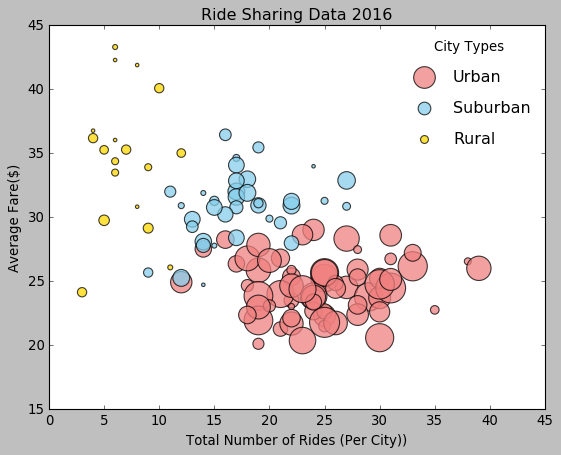

In [127]:
# Obtain the x and y coordinates for each of the three city types
urban = merged_table.loc[merged_table["type"] == "Urban"]
rural = merged_table.loc[merged_table["type"] == "Rural"]
suburbs = merged_table.loc[merged_table["type"] == "Suburban"] 

urban_grouped = urban.groupby(["city"])
rural_grouped = rural.groupby(["city"])
suburbs_grouped = suburbs.groupby(["city"])

# x axis
urban_avg_fares = urban_grouped ["fare"].mean()
rural_avg_fares = rural_grouped ["fare"].mean()
suburbs_avg_fares = suburbs_grouped ["fare"].mean()

# Y axis 
urban_ride_count = urban_grouped ["ride_id"].count()
rural_ride_count = rural_grouped ["ride_id"].count()
suburbs_ride_count = suburbs_grouped ["ride_id"].count()

urban_sizes = urban_grouped["driver_count"].mean()
rural_sizes = rural_grouped["driver_count"].mean()
suburbs_sizes = suburbs_grouped["driver_count"].mean()

# Build the scatter plots for each city types

plt.title('Ride Sharing Data 2016')

#x label
plt.xlabel("Total Number of Rides (Per City))")

#y label 
plt.ylabel("Average Fare($)")


plt.scatter(urban_ride_count, urban_avg_fares, marker="o", color="LightCoral", edgecolors="black",            
            s=urban_sizes*10, alpha=0.75, label="Urban")
plt.scatter(suburbs_ride_count,suburbs_avg_fares, marker="o", color="Skyblue", edgecolors="black",            
            s=suburbs_sizes*10, alpha=0.75, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fares, marker="o", color="Gold", edgecolors="black",            
            s=rural_sizes*10, alpha=0.75, label="Rural")

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Types')
#plt.legend(loc='upper right')
plt.show()


## Total Fares by City Type

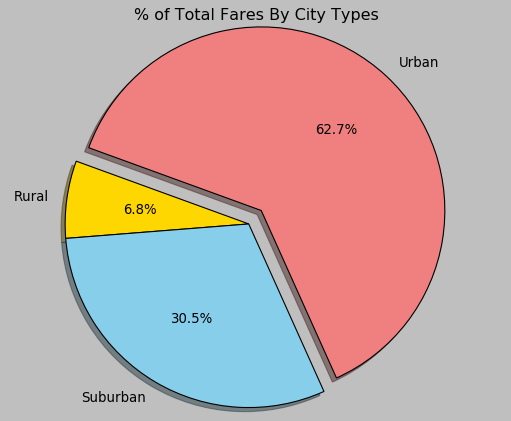

In [124]:
# Calculate Type Percents
total_fare = merged_table.groupby(['type'])['fare'].sum()

# Build Pie ChartLables = ["Rural", "Suburban","Urban"]
labels = ["Rural","Suburban","Urban"]
colors = ["Gold", "Skyblue","LightCoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("% of Total Fares By City Types.png")


# Save Figure"
plt.show()

## Total Rides by City Type

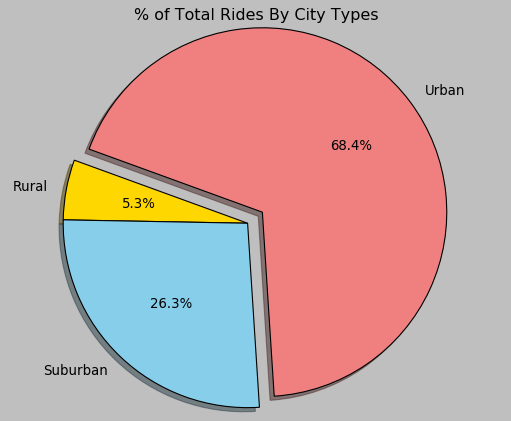

In [111]:
# Calculate Ride Percents
total_rides_by_city = merged_table.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["Gold", "Skyblue","LightCoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides_by_city, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("% of Total Rides By City Types.png")
# Save Figure
plt.show()


In [112]:
# Show Figure
plt.show()

## Total Drivers by City Type

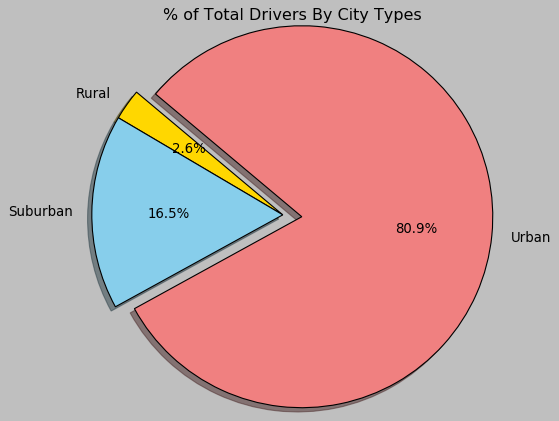

In [123]:
# Calculate Driver Percent


city_data = city_data_df.drop_duplicates('city')
total_drivers = city_data.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
colors = ["Gold", "Skyblue","LightCoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("% of Total Drivers By City Types.png")
plt.show()

        
# Save Figure


In [120]:
# Show Figure
plt.show()